In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [98]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# kNN
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict

from sklearn.metrics import confusion_matrix, r2_score, accuracy_score

In [3]:
plt.rcParams['figure.figsize'] = 5,3

In [4]:
def fun_plot_confusion_matrix(conf):
    cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
    sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [5]:
def fun_conf_mat_calc(conf):
    print('Overall Accuracy:', np.round(((conf.item(0) + conf.item(3)) / conf.sum()) * 100, 2))
    print('TPRate or Recall or Sensitivity i.e. (TP / Actual YES):', 
          np.round((conf.item(3) / (conf.item(2) + conf.item(3)))*100,2))
    print('FPRate i.e. (FP / Actyal NO):', 
          np.round((conf.item(1) / (conf.item(0) + conf.item(1)))*100,2))
    print('Specificity i.e. (TN / Actual NO):', 
          np.round((conf.item(0) / (conf.item(0) + conf.item(1)))*100,2))
    print('Precision i.e. (TP / Predicted YES):', 
          np.round((conf.item(3) / (conf.item(1) + conf.item(3)))*100,2))

In [9]:
path = 'F:/Datasuperspecilization/Exam_17_12_2017/Dec17/'

HR_Data = pd.read_csv(path + 'HR_comma_sep.csv', delimiter= ',')

HR_Data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
HR_Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
#HR data.info()
np.round(HR_Data.describe(),2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [16]:
for i in HR_Data.columns:
    i,HR_Data[i].value_counts()
    print(HR_Data[i].value_counts())

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.37    241
0.78    241
0.82    241
0.89    237
0.76    234
0.83    234
0.72    230
0.50    229
0.66    228
0.75    226
0.87    225
0.43    224
0.91    224
0.80    222
0.90    220
0.81    220
0.59    219
0.79    217
0.44    211
0.57    210
0.63    209
0.49    209
0.69    209
0.40    209
       ... 
0.42    155
0.48    149
0.36    139
1.00    111
0.46     95
0.24     80
0.16     79
0.15     76
0.19     74
0.14     73
0.17     72
0.20     69
0.21     67
0.18     63
0.22     60
0.31     59
0.13     54
0.23     54
0.32     50
0.34     48
0.47     42
0.30     39
0.29     38
0.35     37
0.33     36
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, dtype: int64
0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
0.90    313
0.52    309
0.89    296
0.84    294
0.48    292
0.91    287
1.00    283
0.97    276
0.86    273
0

In [17]:
print(HR_Data.shape,'\n')
print(HR_Data.ndim,'\n')
print(HR_Data.dtypes)

(14999, 10) 

2 

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


From above we can see two attributes data type is object. so lets convert it into integer.

sales          4140 = 0(converting to integer)
technical      2720 = 1(converting to integer)
support        2229 = 2(converting to integer)
IT             1227 = 3(converting to integer)
product_mng     902 = 4(converting to integer)
marketing       858 = 5(converting to integer)
RandD           787 = 6(converting to integer)
accounting      767 = 7(converting to integer)
hr              739 = 8(converting to integer)
management      630 = 9(converting to integer)

Name: salary, dtype: int64
low       7316 = 0(converting to integer)
medium    6446 = 1(converting to integer)
high      1237 = 2(converting to integer)



In [22]:
HR_Data["salary"]= HR_Data["salary"].apply(lambda salary: 0 if salary == 'low' else 1 if salary == 'medium' else 2)
HR_Data["sales"]= HR_Data["sales"].apply(lambda sales: 0 if sales == 'sales' else 1 if sales =='technical' else 2 if sales =='support' else 3 if sales =='IT' else 4 if sales =='product_mng' else 5 if sales =='marketing' else 6 if sales =='RandD' else 7 if sales =='accounting' else 8 if sales =='hr' else 9)

HR_Data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                      int64
salary                     int64
dtype: object

Now every Attribute is converted to Numeric

In [23]:
# Columns not needed
dropped_columns = ['left']
X = HR_Data.drop(dropped_columns, axis =1)

Y = HR_Data.left
print(X)
print(Y)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [25]:
print(X.shape,'\n')
print(Y.shape,'\n')

(14999, 9) 

(14999,) 



Now our Dataset X is ready to fit into any model

In [26]:
logReg = LogisticRegression(C=1e9)

logReg.fit(X, Y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Predict
Y_pred_logReg = logReg.predict(X)

In [30]:
score_logReg = logReg.score(X,Y)
score_logReg
metrics.accuracy_score(Y, Y_pred_logReg)

# Above score is same as METRICS ACCURACY

logReg.intercept_
logReg.coef_

array([[-4.09750567,  0.82466863, -0.30802833,  0.00423821,  0.22293424,
        -1.48952979, -1.35512927,  0.02046447,  0.00454766]])

In [31]:
print(metrics.accuracy_score(Y, Y_pred_logReg))

0.765784385626


Getting 76.57% ACCURACY Score when simple LOGISTIC REGRESSION is applied without CROSS Validation on complete Dataset 

In [32]:
Y_df = pd.DataFrame(Y)
Y_df.columns = ['Left']
Y_df['Left_pred_logReg'] = Y_pred_logReg

In [34]:
print(Y_df.Left.value_counts())
print(Y_df.Left_pred_logReg.value_counts())

0    11428
1     3571
Name: Left, dtype: int64
0    13255
1     1744
Name: Left_pred_logReg, dtype: int64


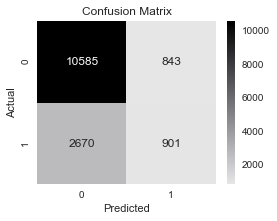

In [35]:
conf_logReg = confusion_matrix(Y, Y_pred_logReg)
conf_logReg
plt.rcParams['figure.figsize'] = 4,3
fun_plot_confusion_matrix(conf_logReg)

In [36]:
fun_conf_mat_calc(conf_logReg)

Overall Accuracy: 76.58
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 25.23
FPRate i.e. (FP / Actyal NO): 7.38
Specificity i.e. (TN / Actual NO): 92.62
Precision i.e. (TP / Predicted YES): 51.66


Lets try to apply Cross validation on Logistic Regression.

In [37]:
#Lets find out the best fold CV for our Data Set
for i in range(5,24):
    i
    score_logReg_CV = cross_val_score(logReg, X, Y, cv=i, scoring='accuracy') # Calculating Accuracy Score
    print(score_logReg_CV)
    print(score_logReg_CV.mean())
    print(i)

[ 0.77107631  0.77333333  0.778       0.76625542  0.61953985]
0.741640981264
5
[ 0.77489004  0.7732      0.7748      0.7732      0.76190476  0.64945978]
0.751242431633
6
[ 0.77378731  0.77368175  0.76668222  0.78534764  0.76797386  0.73295985
  0.71288515]
0.759045399077
7
[ 0.77452026  0.76865672  0.77398721  0.77973333  0.77481323  0.76840982
  0.72091782  0.71504803]
0.759510801648
8
[ 0.77324535  0.77204559  0.77564487  0.77024595  0.78584283  0.76784643
  0.76604679  0.71111111  0.70870871]
0.758970848473
9
[ 0.77614923  0.76666667  0.77733333  0.77        0.78066667  0.776
  0.77133333  0.76066667  0.71314209  0.70113409]
0.759309208463
10
[ 0.77346041  0.77346041  0.77565982  0.76173021  0.77932551  0.78958944
  0.76173021  0.77402788  0.75495231  0.72927366  0.69823789]
0.761040704454
11
[ 0.77378098  0.77697842  0.76498801  0.78177458  0.7624      0.7832
  0.7888      0.76060849  0.76621297  0.76060849  0.7213771   0.69495596]
0.761307082735
12
[ 0.77575758  0.7729636   0.7703

After applying CV on Logistic Regression we are getting max 76.25% accuracy at 17 fold cross validation.
Lets try Random Forest model here

In [52]:
#Random Forest model with Entropy and Max depth '12'
RF_1 = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=12)


RF_1.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [53]:
score_RF1 = RF_1.score(X,Y)
print(score_RF1)
Y_pred_RF1 = RF_1.predict(X)
Y_df['Left_pred_RF1'] = Y_pred_RF1
conf_RF1 = confusion_matrix(Y, Y_pred_RF1)
print(conf_RF1)

0.988265884392
[[11411    17]
 [  159  3412]]


In [51]:
#Random Forest model with GINI and Max depth '12'
RF_2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=12)


RF_2.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [50]:
score_RF2 = RF_2.score(X,Y)
print(score_RF2)
Y_pred_RF2 = RF_2.predict(X)
Y_df['Left_pred_RF2'] = Y_pred_RF2
conf_RF2 = confusion_matrix(Y, Y_pred_RF2)
print(conf_RF2)

0.991866124408
[[11413    15]
 [  107  3464]]


Random Forest with Cross-Validation will avoid OVERFIT

In [54]:
#Lets find out the best fold CV for RF1
for i in range(5,24):
    i
    score_RF_1_CV = cross_val_score(RF_1, X, Y, cv=i, scoring='accuracy') # Calculating Accuracy Score
    print(score_RF_1_CV)
    print(score_RF_1_CV.mean())
    print(i)

[ 0.98867044  0.98        0.98166667  0.987996    0.98632878]
0.984932376955
5
[ 0.99160336  0.9816      0.9768      0.9892      0.98479392  0.98439376]
0.984731838954
6
[ 0.99020522  0.98273448  0.97946804  0.98086794  0.98972923  0.98552754
  0.98739496]
0.985132487601
7
[ 0.99200426  0.98294243  0.98134328  0.97546667  0.98665955  0.98879402
  0.98772679  0.98719317]
0.985266272237
8
[ 0.99220156  0.9820036   0.98320336  0.97660468  0.98140372  0.9910018
  0.98140372  0.99159159  0.98678679]
0.985133423766
9
[ 0.99133911  0.984       0.98        0.97866667  0.978       0.98466667
  0.99333333  0.98333333  0.98932622  0.98732488]
0.9849990208
10
[ 0.99266862  0.98826979  0.978739    0.98387097  0.9728739   0.98093842
  0.98973607  0.98826119  0.97945708  0.99119589  0.98751836]
0.984866299045
11
[ 0.99040767  0.98960831  0.97921663  0.98401279  0.9752      0.9784
  0.9864      0.99279424  0.98478783  0.98158527  0.99039231  0.98799039]
0.985066286976
12
[ 0.99047619  0.99220104  0.97

From the above we got 98.51% at 9 Fold Cross-Validation(cv=9) of RF1(with Entropy and max depth '12')

Lets find CV same as above for RF2(with GINI and max depth '12')

In [56]:
#Lets find out the best fold CV for RF2
for i in range(5,11):
    i
    score_RF_2_CV = cross_val_score(RF_2, X, Y, cv=i, scoring='accuracy') # Calculating Accuracy Score
    print(score_RF_2_CV)
    print(score_RF_2_CV.mean())
    print(i)

[ 0.99166944  0.98        0.98233333  0.99033011  0.98666222]
0.986199021526
5
[ 0.9920032   0.9816      0.9764      0.99        0.98559424  0.98519408]
0.985131919008
6
[ 0.99067164  0.98226785  0.97993467  0.98180121  0.99112979  0.98646125
  0.99066293]
0.986132763304
7
[ 0.99147122  0.98240938  0.98240938  0.976       0.98719317  0.98719317
  0.98772679  0.98932764]
0.985466343386
8
[ 0.99340132  0.98260348  0.98380324  0.9760048   0.9820036   0.9940012
  0.98260348  0.99339339  0.98798799]
0.986200277462
9
[ 0.99200533  0.98666667  0.98        0.97866667  0.97866667  0.98533333
  0.99133333  0.982       0.98932622  0.98732488]
0.985132309718
10


From the above we got 98.62% at 9 Fold Cross-Validation(cv=9) of RF1(with GINI and max depth '12')

**Random Forest with Cross-Validation will avoid OVERFIT**

In [66]:
score_RF1_cv = cross_val_score(RF_1, X, Y, cv = 9)
score_RF1_cv.mean()

0.98473350374970048

In [67]:
score_RF2_cv = cross_val_score(RF_2, X, Y, cv = 9)
score_RF2_cv.mean()

0.98566697070996212

In [68]:
Y_pred_RF1_cv = cross_val_predict(RF_1, X, Y, cv = 9)
Y_df['Left_pred_RF1_cv'] = Y_pred_RF1_cv
conf_RF1_cv = confusion_matrix(Y, Y_pred_RF1_cv)
conf_RF1_cv

array([[11408,    20],
       [  201,  3370]])

In [69]:
Y_pred_RF2_cv = cross_val_predict(RF_2, X, Y, cv = 9)
Y_df['Left_pred_RF2_cv'] = Y_pred_RF2_cv
conf_RF2_cv = confusion_matrix(Y, Y_pred_RF2_cv)
conf_RF2_cv

array([[11407,    21],
       [  194,  3377]])

Lets try KNN model to fit into our Data Set

In [57]:
# Find optimal k value in knn
k_range = range(1, 25)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.97053488779328345, 0.97126768767452776, 0.96106555214765277, 0.95599786180645707, 0.94826461629538505, 0.95759799516947941, 0.95379763902117287, 0.95526448364347405, 0.94999741605811094, 0.95193114971754811, 0.94706377116908358, 0.94939768266563662, 0.9447968373615574, 0.946063859880234, 0.9433301261022784, 0.94433021510972515, 0.94199652586512261, 0.94326341478373998, 0.94099616983533474, 0.94286297016132004, 0.93952919179075189, 0.94046256971669773, 0.93739541377573943, 0.93826221386468767]


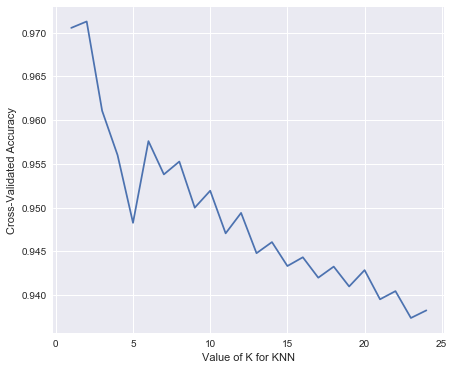

In [58]:
# Plot the value of k for KNN vs cross-validated accuracy
plt.rcParams['figure.figsize'] = 7,6
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [61]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [62]:
score_knn = knn.score(X,Y)
score_knn

0.99206613774251617

After fitting KNN, maximum 97% accuracy is getting which is less than RF_1 and RF_2

In [63]:
#KNN with 10 Fold Cross_Validation to avoid OVREFIT
score_knn_cv = cross_val_score(knn, X, Y, cv=9, scoring='accuracy')
score_knn_cv
score_knn_cv.mean()

0.97113830487155839

In [74]:
# Predict for KNN with cross_val_predict
Y_pred_knn_cv = cross_val_predict(knn, X, Y, cv=9)
Y_df['Left_pred_knn_cv'] = Y_pred_knn_cv
conf_knn_cv = confusion_matrix(Y, Y_pred_knn_cv)
conf_knn_cv

array([[11186,   242],
       [  191,  3380]])

In [77]:
for i in [conf_logReg, conf_knn_cv, conf_RF1, conf_RF1_cv, conf_RF2, conf_RF2_cv]:
    i
    fun_conf_mat_calc(i)

Overall Accuracy: 76.58
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 25.23
FPRate i.e. (FP / Actyal NO): 7.38
Specificity i.e. (TN / Actual NO): 92.62
Precision i.e. (TP / Predicted YES): 51.66
Overall Accuracy: 97.11
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 94.65
FPRate i.e. (FP / Actyal NO): 2.12
Specificity i.e. (TN / Actual NO): 97.88
Precision i.e. (TP / Predicted YES): 93.32
Overall Accuracy: 98.83
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 95.55
FPRate i.e. (FP / Actyal NO): 0.15
Specificity i.e. (TN / Actual NO): 99.85
Precision i.e. (TP / Predicted YES): 99.5
Overall Accuracy: 98.53
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 94.37
FPRate i.e. (FP / Actyal NO): 0.18
Specificity i.e. (TN / Actual NO): 99.82
Precision i.e. (TP / Predicted YES): 99.41
Overall Accuracy: 99.19
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 97.0
FPRate i.e. (FP / Actyal NO): 0.13
Specificity i.e. (TN / Actual NO): 99.87
Precision i.e. (TP /

***RF_2 model (Randome Forest with CV =9, criterion='gini'and max_depth=12) is giving the best accuracy as compare to other models.***

Overall Accuracy: 98.57
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 94.57
FPRate i.e. (FP / Actyal NO): 0.18
Specificity i.e. (TN / Actual NO): 99.82
Precision i.e. (TP / Predicted YES): 99.38****

***Finally Random Forest model will give the better results for our Data set.***

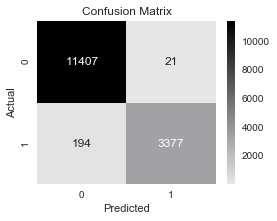

In [79]:
conf_RF2_cv = confusion_matrix(Y, Y_pred_RF2_cv)
conf_RF2_cv
plt.rcParams['figure.figsize'] = 4,3
fun_plot_confusion_matrix(conf_RF2_cv)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)





(11249, 9)
(3750, 9)
(11249,)
(3750,)


Divided the Train Data and Test Data now lets Fit the Model 

In [85]:
RF_2_X_train = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=12)


RF_2_X_train.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

[[8538   21]
 [ 155 2535]]


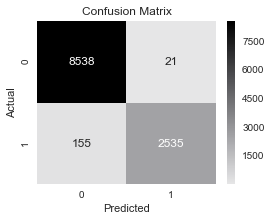

Overall Accuracy: 98.44
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 94.24
FPRate i.e. (FP / Actyal NO): 0.25
Specificity i.e. (TN / Actual NO): 99.75
Precision i.e. (TP / Predicted YES): 99.18


In [90]:
Y_pred_RF2_cv_X_train = cross_val_predict(RF_2_X_train, X_train, y_train, cv = 9)
#Y_df['Left_pred_RF2_cv_X_train'] = Y_pred_RF2_cv_X_train
conf_RF2_cv_X_train = confusion_matrix(y_train, Y_pred_RF2_cv_X_train)
print(conf_RF2_cv_X_train)
fun_plot_confusion_matrix(conf_RF2_cv_X_train)
fun_conf_mat_calc(conf_RF2_cv_X_train)

[[2861    8]
 [  56  825]]


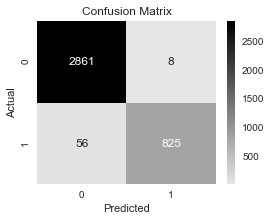

Overall Accuracy: 98.29
TPRate or Recall or Sensitivity i.e. (TP / Actual YES): 93.64
FPRate i.e. (FP / Actyal NO): 0.28
Specificity i.e. (TN / Actual NO): 99.72
Precision i.e. (TP / Predicted YES): 99.04


In [93]:
Y_pred_RF2_cv_X_test = cross_val_predict(RF_2_X_train, X_test, y_test, cv = 9)
#Y_df['Left_pred_RF2_cv_X_train'] = Y_pred_RF2_cv_X_train
conf_RF2_cv_X_test = confusion_matrix(y_test, Y_pred_RF2_cv_X_test)
print(conf_RF2_cv_X_test)
fun_plot_confusion_matrix(conf_RF2_cv_X_test)
fun_conf_mat_calc(conf_RF2_cv_X_test)

In [97]:
Y_df_final = Y_df.drop('Churn_T_pred_RF1', axis=1)
Y_df_final

,Left,Left_pred_logReg,Left_pred_RF1,Left_pred_RF2,Left_pred_knn_cv,Left_pred_RF1_cv,Left_pred_RF2_cv
0,1,0,1,1,1,1,1
1,1,0,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1
4,1,0,1,1,1,1,1
5,1,0,1,1,1,1,1
6,1,1,1,1,1,1,1
7,1,0,1,1,1,1,1
8,1,0,1,1,1,1,1
9,1,0,1,1,1,1,1


Finally, considering all applied models here, we shall consider RF2_cv i.e. RandomForest applied with 9 Fold Cross-Validation. Reasons below:

Considering RandomForest with 100 DecisionTrees helps already in avoiding Overfitting

9 Fold Cross Validation on this further reduces any sort of OVERFIT on this model, thus making model more realistic

Accuracy for this comes to be 98% which is pretty good

Basis Confusion Matrix, we can see that Recall (True-Positive-Rate) is around 93%, which is more realistic

False-Positive-Rate is also very low i.e. 0.28%

Overall Specificity and Precision is also at 99% & 99% respectively which is preety good

Though from all above, maximum accuracy as 98% is given by RF2_cv i.e. RandomForest applied only without Cross-Validation.